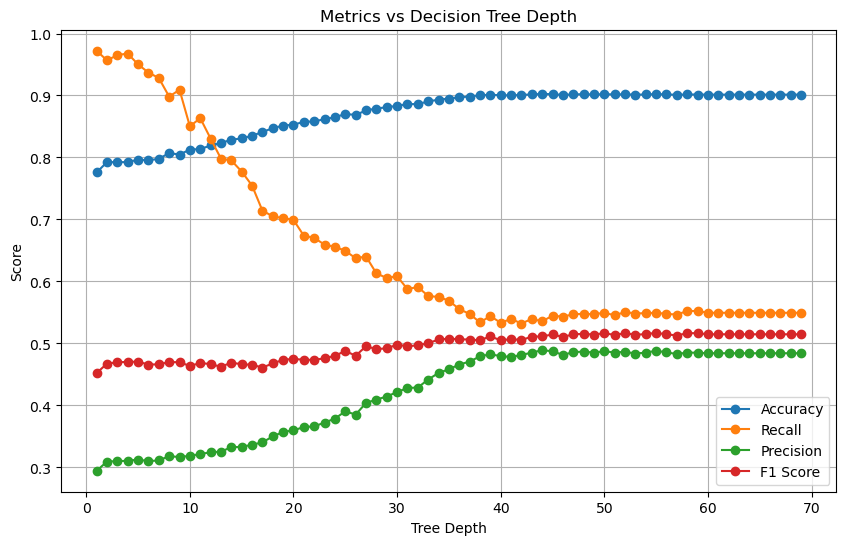

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt


# Read the CSV file
df = pd.read_csv('input.csv')

# Drop the columns you want to ignore
df = df.drop(columns=['id', 'name', 'orbiting_body', 'sentry_object'])

# Separate features and target variable
X = df.drop(columns=['hazardous'])
y = df['hazardous']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance on the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


from sklearn.metrics import precision_score, recall_score, f1_score

accuracies = []
recalls = []
precisions = []
f1_scores = []
depths = range(1, 70)
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # Train the classifier
    clf.fit(X_train_resampled, y_train_resampled)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    recalls.append(recall)
    precisions.append(precision)
    f1_scores.append(f1)

plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, label='Accuracy', marker='o')
plt.plot(depths, recalls, label='Recall', marker='o')
plt.plot(depths, precisions, label='Precision', marker='o')
plt.plot(depths, f1_scores, label='F1 Score', marker='o')
plt.title('Metrics vs Decision Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

[Text(0.5, 0.8333333333333334, 'est_diameter_max <= 0.237\ngini = 0.5\nsamples = 131114\nvalue = [65557, 65557]\nclass = Not Hazardous'),
 Text(0.25, 0.5, 'est_diameter_max <= 0.227\ngini = 0.012\nsamples = 49983\nvalue = [49673, 310]\nclass = Not Hazardous'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.004\nsamples = 49229\nvalue = [49138, 91]\nclass = Not Hazardous'),
 Text(0.375, 0.16666666666666666, 'gini = 0.412\nsamples = 754\nvalue = [535, 219]\nclass = Not Hazardous'),
 Text(0.75, 0.5, 'relative_velocity <= 21301.85\ngini = 0.315\nsamples = 81131\nvalue = [15884, 65247]\nclass = Hazardous'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.415\nsamples = 1914\nvalue = [1352, 562]\nclass = Not Hazardous'),
 Text(0.875, 0.16666666666666666, 'gini = 0.3\nsamples = 79217\nvalue = [14532, 64685]\nclass = Hazardous')]

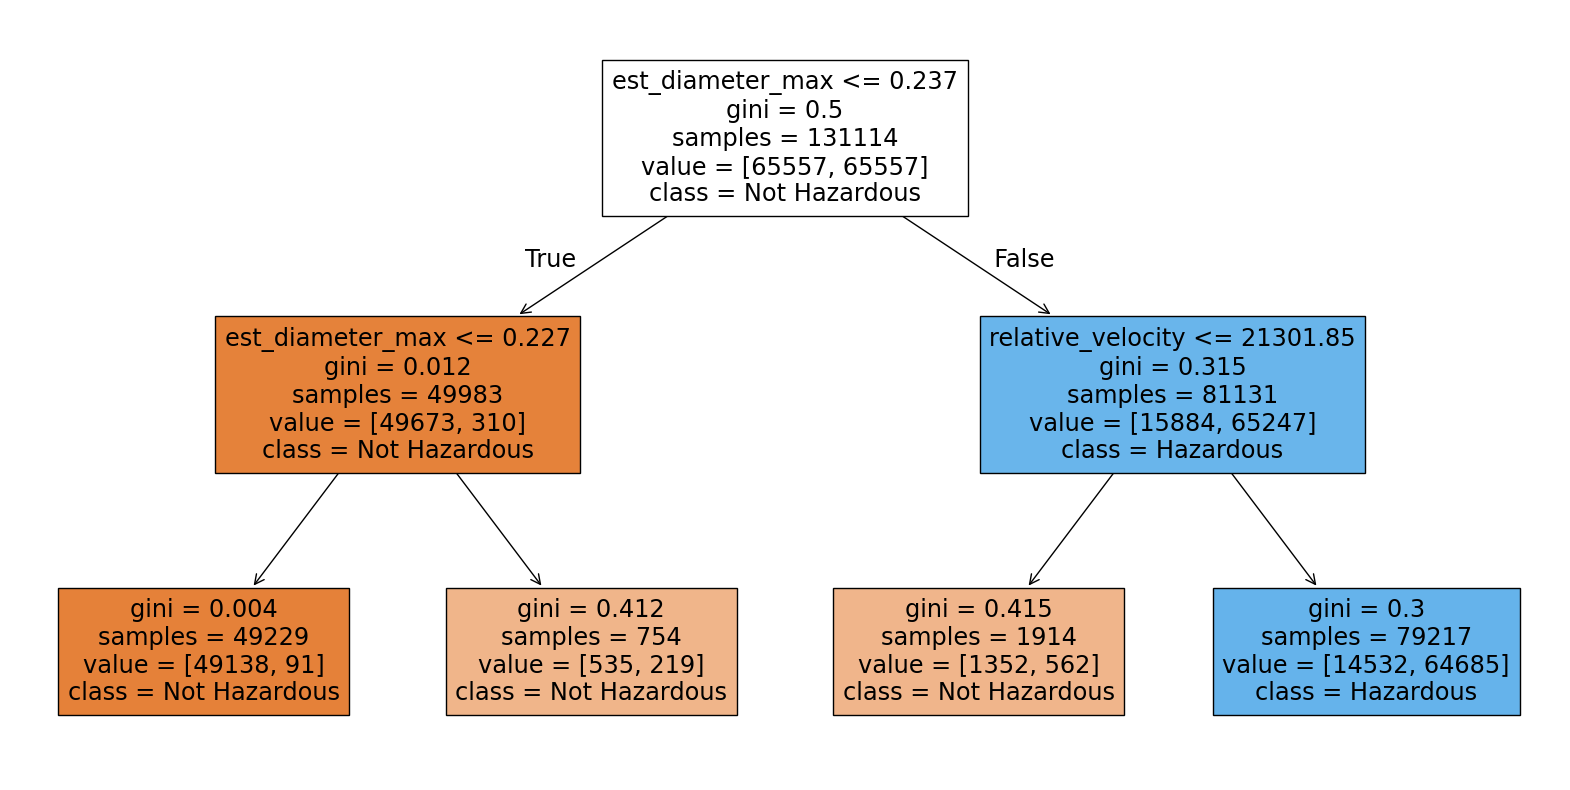

In [3]:
# Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


clf = DecisionTreeClassifier(max_depth=2, random_state=42)

clf.fit(X_train_resampled, y_train_resampled)

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Hazardous', 'Hazardous'])